In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy import *

In [4]:
f = lambda x: (1/3)*(x**2)+(1)
# Especificar función matemática cuya área se va a aproximar

partición = [4, 10, 25, 100]
# Definir lista con elementos correspondientes al número de particiones requerido

def crear_tabla(resultados):
    # Crear tabla (DataFrame) a partir de resultados en el formato requerido
    tabla = pd.DataFrame.from_dict(resultados)
    return tabla


def calcular_integral(a, b):
    #Función para calcular valor de integral de la función en los intervalos (a, b) que se incluyen como parámetros
    x = Symbol("x")
    # Definir variable sobre la cual se va a calcular la integral
    función = (1/3)*(x**2)+1
    return integrate(función, (x, a, b))
    # llamar función integrate de sympy que permite obtener el resultado de la integral de la función automáticamente


def calcular_suma_riemann(f, n, a ,b, graficar=False):
    # función para calcular la suma de riemann

    delta_x = (b-a)/n
    # Calcular delta_x que es la diferencia que existe entre cada partición dado por la formula (intervalo final - intervalo inicial)/número de paticiones

    x = np.linspace(a, b, n)[1:]
    # definir array con valores especificados de intervalo dividido en n particiones e indexar todos menos el primer elemento para calcular la suma de riemann superior

    y = f(x)

    A = y * delta_x
    # Calcular aproximación

    if not graficar:
        # Si no se graficar retornar suma de todas las aproximaciones y obtener el resultado final
        return sum(A)
    else:
        # Sino, definir variables para graficar

        x = np.linspace(a, b, n+1)[1:]
        # Sobreescribir variable x pero con n+1 particiones por motivos estéticos de la visualización
        
        X = np.linspace(a, b, n*(n+1))[1:]
        # Definivir variable X (mayúscula) para dibujar curva con n*(n+1) particiones para suavizar curva en el gráfico

        y = f(x)
        Y = f(X)
        # Aproximaciones

        plt.plot(X, Y)
        # Graficar curva con matplotlib

        plt.plot(x, y,'b.',markersize=10)
        # Graficar aproximación de rectángulos con suma de Riemann

        plt.bar(x, y,width=-delta_x,alpha=0.2,align='edge',edgecolor='b')
        # Graficar rectángulos de largo "x" y altura "y" y "delta_x" de ancho

        plt.title('Suma de Riemann por Superior, N = {}'.format(n))
        # Título para graficar y especificar particiones
    

def calcular_error(valor_exacto, valor_aproximado):
    # Función para calcular error de aproximación de Suma de Riemann con respecto a la integral definida de la función en el intervalo correspondiente
    return ((np.absolute(valor_exacto - valor_aproximado)) / valor_exacto) * 100


def calcular_minima_particion(f, integral):
    # Función para calcular la partición mínima para obtener un error de 0.001
    error_mínimo = 0.001

    error_actual = float('inf')
    # Definir variable para hacer seguimiento a los errores

    n = 10
    # Comenzar desde las 100 particiones para ahorrar iteraciones (Se evidencia en la comparativa que no se alcanza el valor de error requerido con dicha partición)

    while error_actual > error_mínimo:
        # Ciclo While con condición de que el error a dar seguimiento es mayor al error mínimo
        # Al momento de satisfacer la condición, detener ciclo...

        aproximación = calcular_suma_riemann(f, n=n, a=0, b=4)
        # Aproximación

        error_actual = np.absolute(calcular_error(integral, aproximación))
        # Error de la aproximación con respecto a la integral

        n = n + 1

        print(f"Error en iteración {n} = {error_actual}")
        # Aumentar particiones mientras se mantenga por debajo del error a alcanzar

    print(f"\n Error mínimo actual = {error_actual} \n Error mínimo por alcanzar = {error_mínimo} \n Partición = {n-1}")

In [5]:
integral = calcular_integral(a=0, b=4)
suma_4 = calcular_suma_riemann(f=f, n=4, a=0, b=4)
suma_10 = calcular_suma_riemann(f=f, n=10, a=0, b=4)
suma_25 = calcular_suma_riemann(f=f, n=25, a=0, b=4)
suma_100 = calcular_suma_riemann(f=f, n=100, a=0, b=4)

resultados = {
    'Partición':[4, 10, 25, 100],
    'Suma':[suma_4,
            suma_10,
            suma_25,
            suma_100
            ],
    'Error%':[
              str(round(calcular_error(valor_exacto=integral, valor_aproximado=suma_4), 3)) + '%',
              str(round(calcular_error(valor_exacto=integral, valor_aproximado=suma_10), 3)) + '%',
              str(round(calcular_error(valor_exacto=integral, valor_aproximado=suma_25), 3)) + '%',
              str(round(calcular_error(valor_exacto=integral, valor_aproximado=suma_100), 3)) + '%'
              ]
}

crear_tabla(resultados=resultados)

,Partición,Suma,Error%
0,4,11.296296,1.667%
1,10,11.106173,0.044%
2,25,11.099259,0.107%
3,100,11.107026,0.037%


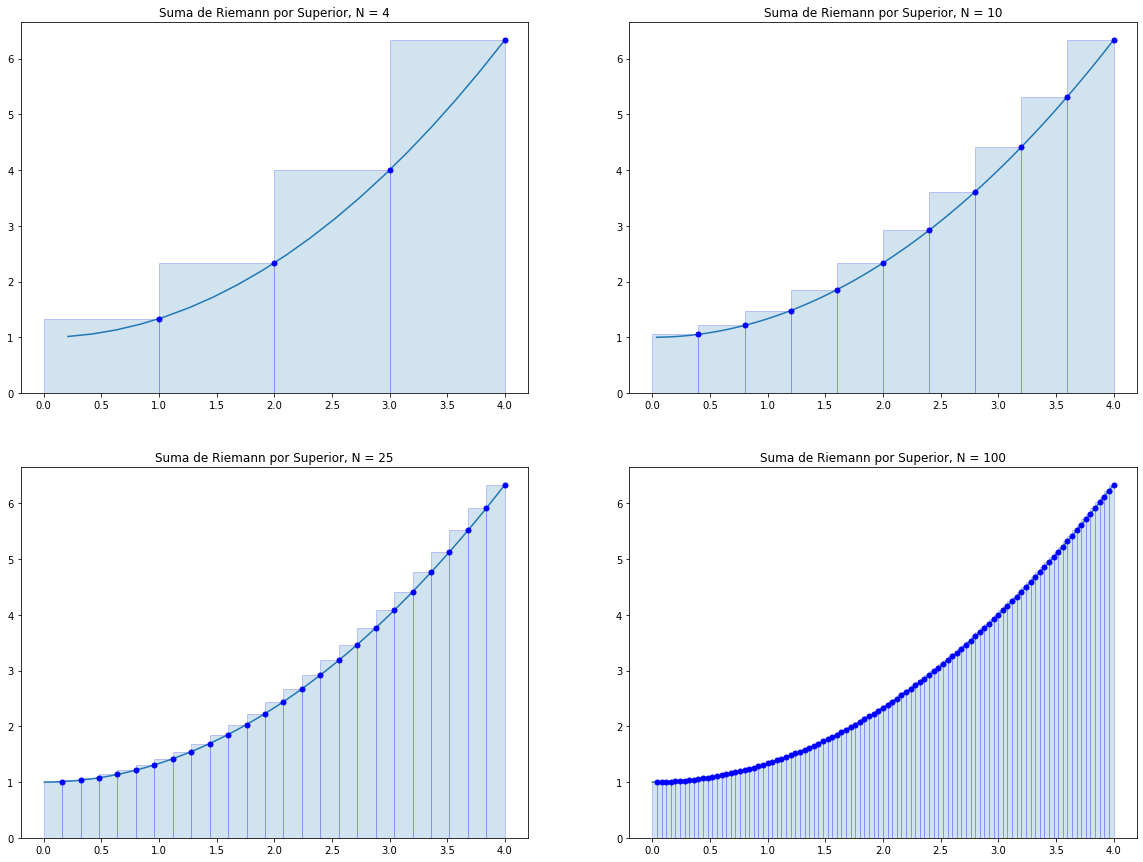

In [6]:
def graficar_partición(partición, f):
    figure = plt.figure(figsize=(20, 15))
    for i in range(len(partición)):
        ax = plt.subplot(2, 2, i+1)
        calcular_suma_riemann(f=f, n=partición[i], a=0, b=4, graficar=True)


graficar_partición(partición, f)

In [3]:
calcular_minima_particion(f=f, integral=integral)

NameError: ignored

## Teoría

Edwin J. Purcell define la Suma de Riemann de la siguiente manera: **"**Suponga una partición $P$ del intervalo $[a, b]$ en n subintervalos (no necesariamente de la misma longitud) por medio de los puntos a = $x_0 < x_1 < x_2 < ... < x_{n-1} < x_n = b, y$
sea ${\Delta}x= x_i - x_{i-1}$ . En cada subintervalo $[x_{i-1}, x_i
]$ selecciónese un punto (que puede ser
un punto frontera); le llamamos punto muestra para el i-ésimo subintervalo ... Le llamamos a la Suma de Riemann ${R_p}=\sum_{i=1}^{n}f(x){\Delta}x$**"**.


## Análisis

La Suma de Riemann es dada por la ecuación $\sum_{i=1}^{n} f(x){\Delta}x$ donde:

*   ${\Delta}x=\frac{b-a}{n}$ donde $a, b$ son los intervalos definidos.
*   $n=$número de particiones.


De los resultados obtenidos se evidencia que la información contenida en ${\Delta}x$, es decir $\frac{b-a}{n}$, engloba la separación de cada rectángulo $n$ en la función, lo cual al ser multiplicado por $f(x)$ efectúa una "distribución" de dichas particiones existintes en el dominio de la función a aproximar.

Al incrementar el número de particiones, los rectángulos que aproximan el área bajo la curva aumentan ($n=rectángulos$), lo que implica que ${\Delta}x$ es cada vez menor y el área en un punto específico es más exacto, como consecuencia se obtienen mejores estimaciones en cada iteración.

Fuentes bibliográficas:

Edwin J. Purcell, Dale Varberg, Steven E. Rigdon, **Cálculo Diferencial e Integral**, Edición N°9, 2007

